# Proyecto de detección de diabetes en farmacias

In [42]:
import pandas as pd


file_path = "Diabetes.csv"


df = pd.read_csv(file_path)


print(df.head())

   Embarazos  Glucosa  Presión sanguínea  Pliegue cutáneo  Insulina  \
0          6      148                 72               35         0   
1          1       85                 66               29         0   
2          8      183                 64                0         0   
3          1       89                 66               23        94   
4          0      137                 40               35       168   

  Índice de masa corporal Pedigrí diabetes  Edad Diabetes  \
0                    33,6            0,627    50       Sí   
1                    26,6            0,351    31       No   
2                    23,3            0,672    32       Sí   
3                    28,1            0,167    21       No   
4                    43,1            2,288    33       Sí   

         Medicación previa Observaciones Fecha de diagnóstico  
0                      NaN           NaN           2016-01-04  
1                   prozac           NaN           2016-01-04  
2             

# Analisis exploratorio de los datos

In [43]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Embarazos                768 non-null    int64 
 1   Glucosa                  768 non-null    int64 
 2   Presión sanguínea        768 non-null    int64 
 3   Pliegue cutáneo          768 non-null    int64 
 4   Insulina                 768 non-null    int64 
 5   Índice de masa corporal  768 non-null    object
 6   Pedigrí diabetes         768 non-null    object
 7   Edad                     768 non-null    int64 
 8   Diabetes                 768 non-null    object
 9   Medicación previa        14 non-null     object
 10  Observaciones            13 non-null     object
 11  Fecha de diagnóstico     768 non-null    object
dtypes: int64(6), object(6)
memory usage: 72.1+ KB
None


El dataset consta de variables numéricas y categóricas:

- Numéricas: embarazos, glocosa, presión sanguinea, pliegue cutáneo, insulina, pedigrí diabetes,  edad
- Categóricas: Diabetes y medicación 
Medicación previa y Observaciones tienen muchos valores nulos por lo que no trabajaré con ellas. La fecha tampoco la utilizaré, dado que no está relacionada con la diabetes.

La variable objetivo a predecir es si el individuo tiene diabetes.


Por otro lado las variables: IMC y pedrigri diabetes, estan en tipo objeto e interesa que sean float (numéricas) para trabajar con ellas. Las transformo:

In [44]:
df["Índice de masa corporal"] = df["Índice de masa corporal"].str.replace(',', '.').astype(float)
df["Pedigrí diabetes"] = df["Pedigrí diabetes"].str.replace(',', '.').astype(float)

## Análisis estadístico

In [45]:
print(df.describe())

        Embarazos     Glucosa  Presión sanguínea  Pliegue cutáneo    Insulina  \
count  768.000000  768.000000         768.000000       768.000000  768.000000   
mean     3.845052  120.894531          69.105469        20.536458   79.799479   
std      3.369578   31.972618          19.355807        15.952218  115.244002   
min      0.000000    0.000000           0.000000         0.000000    0.000000   
25%      1.000000   99.000000          62.000000         0.000000    0.000000   
50%      3.000000  117.000000          72.000000        23.000000   30.500000   
75%      6.000000  140.250000          80.000000        32.000000  127.250000   
max     17.000000  199.000000         122.000000        99.000000  846.000000   

       Índice de masa corporal  Pedigrí diabetes        Edad  
count               768.000000        768.000000  768.000000  
mean                 31.992578          0.471876   33.240885  
std                   7.884160          0.331329   11.760232  
min               

LLama la atención la columna de embarazos con una media de practicamente cuatro y un máximo de 17. 

Voy a eliminar los ceros de las columnas ya que ningún ser humano tiene cero de insulina ni cero de pliegue cutaneo.

In [46]:
# Convert columns to numeric where applicable
numeric_columns = ['Embarazos', 'Glucosa', 'Presión sanguínea', 'Pliegue cutáneo', 'Insulina', 'Índice de masa corporal', 'Pedigrí diabetes']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count zeros in each column
zero_counts = (df[numeric_columns] == 0).sum()

# Display the count of zeros for each column
print(zero_counts)

Embarazos                  111
Glucosa                      5
Presión sanguínea           35
Pliegue cutáneo            227
Insulina                   374
Índice de masa corporal     11
Pedigrí diabetes             0
dtype: int64


Efectivamente hay muchos ceros. Hay varias opciones:
- Eliminar las columnas
- Eliminar las filas
- Sustituir por la media o por la mediana

Eligiré eliminar las columnas, dado que además la insulina es una prueba que requiere análisis de sangre y por lo tanto aumentaría el coste. El pliegue cutaneo es barato, pero de nuevo, hay una cantidad exagerada de ceros.

Las variables que usaré para predeir la diabetes serán: Glucosa (es barato ya que solo requiere un pinchazo en el dedo), presión (prueba sencilla que se realiza en cualquier farmacia) y finalmente IMC ( solo requiere pesar y medir a la persona). Pedigrí diabetes no la usaré dado que requiere tener todo el historial familiar del individuo, algo que en una farmacia resulta complicado.


## Visualización de correlaciones

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Categorizar la variable objetivo y realizar encoding
# Categorizar la variable objetivo y realizar encoding con LabelEncoder
label_encoder = LabelEncoder()
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])

df.head()


,Embarazos,Glucosa,Presión sanguínea,Pliegue cutáneo,Insulina,Índice de masa corporal,Pedigrí diabetes,Edad,Diabetes,Medicación previa,Observaciones,Fecha de diagnóstico
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,2016-01-04
1,1,85,66,29,0,26.6,0.351,31,0,prozac,NaN,2016-01-04
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN,2016-01-04
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN,2016-01-05
4,0,137,40,35,168,43.1,2.288,33,1,"omeoprazol,simvastatina",NaN,2016-01-05


/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


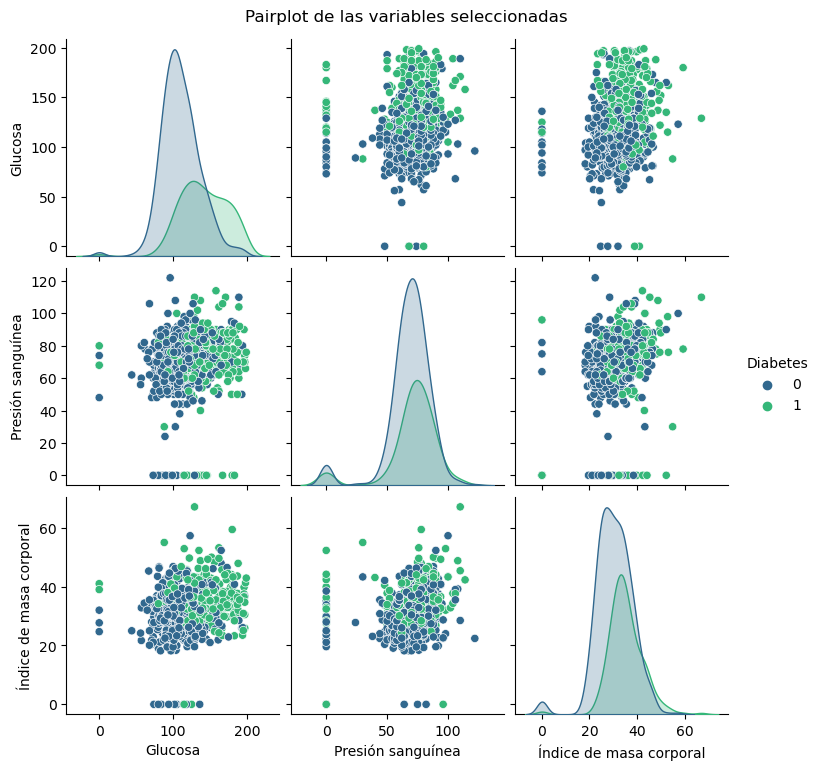

                          Glucosa  Presión sanguínea  Índice de masa corporal  \
Glucosa                  1.000000           0.152590                 0.221071   
Presión sanguínea        0.152590           1.000000                 0.281805   
Índice de masa corporal  0.221071           0.281805                 1.000000   
Diabetes                 0.466581           0.065068                 0.292695   

                         Diabetes  
Glucosa                  0.466581  
Presión sanguínea        0.065068  
Índice de masa corporal  0.292695  
Diabetes                 1.000000  


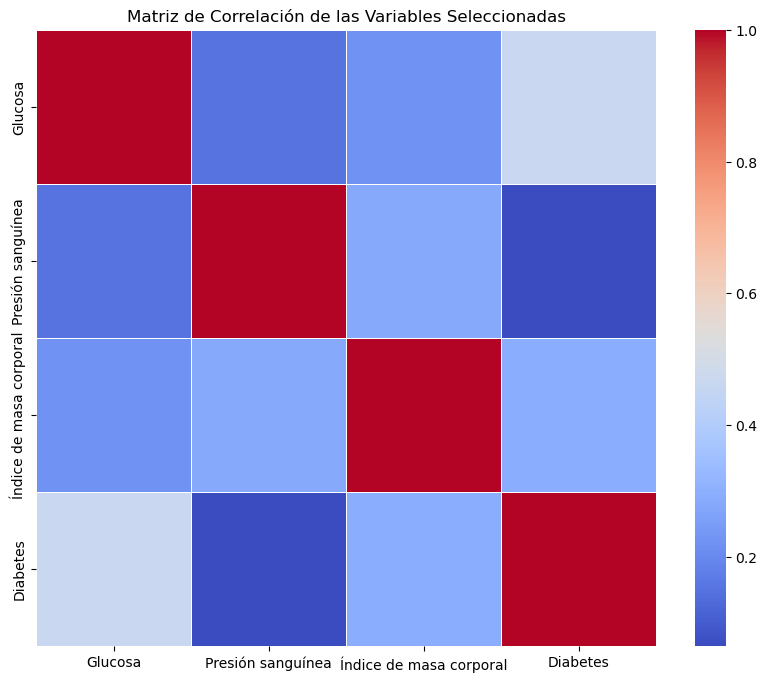

In [51]:
# Seleccionar las variables de interés
selected_columns = ['Glucosa', 'Presión sanguínea', 'Índice de masa corporal', 'Diabetes']
selected_df = df[selected_columns]

# Pairplot para visualizar relaciones entre variables
sns.pairplot(selected_df, hue='Diabetes', palette='viridis')
plt.suptitle('Pairplot de las variables seleccionadas', y=1.02)
plt.show()

# Calcular la matriz de correlación
correlation_matrix = selected_df.corr()
print(correlation_matrix)
# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de las Variables Seleccionadas')
plt.show()

La glucosa parece ser la variable mas correlacionada con la diabetes, con un 0.466581.

# Entrenamiento de Arbol de decisión y de regresión logística

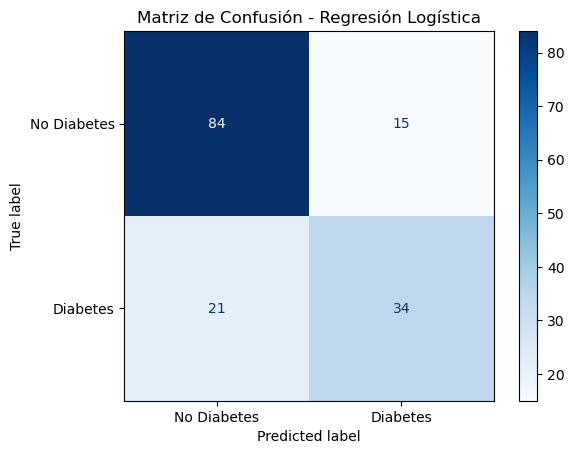

Resultados del modelo de Regresión Logística:
Precisión: 0.77
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.69      0.62      0.65        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



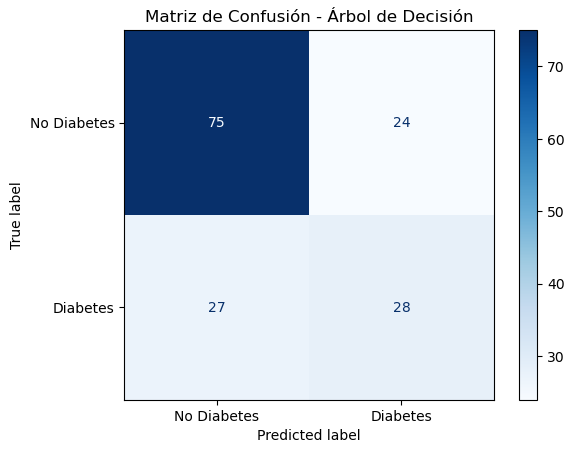

Resultados del modelo de Árbol de Decisión:
Precisión: 0.67
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        99
           1       0.54      0.51      0.52        55

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.66      0.67      0.67       154



In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Separar las features (X) y la variable objetivo (y)
X = selected_df.drop('Diabetes', axis=1)
y = selected_df['Diabetes']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas a normalizar
numeric_features = X.columns

# Crear el transformador para normalizar las columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Crear el transformador principal que aplicará la normalización a las columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Crear y entrenar el modelo de regresión logística con normalización
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

logistic_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba y evaluar la precisión
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Matriz de confusión y métricas para regresión logística
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=['No Diabetes', 'Diabetes'])
disp_logistic.plot(cmap="Blues", values_format="d")
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

print('Resultados del modelo de Regresión Logística:')
print(f'Precisión: {accuracy_logistic:.2f}')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_logistic))

# Crear y entrenar el modelo de árbol de decisión con normalización
tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba y evaluar la precisión
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Matriz de confusión y métricas para árbol de decisión
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=['No Diabetes', 'Diabetes'])
disp_tree.plot(cmap="Blues", values_format="d")
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

print('Resultados del modelo de Árbol de Decisión:')
print(f'Precisión: {accuracy_tree:.2f}')
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred_tree))

### Análisis de Resultados para Cliente:

Hemos evaluado dos modelos para predecir la presencia de diabetes en un conjunto de datos. Aquí está el análisis de los resultados clave:

Modelo de Regresión Logística:

Precision General: 77%

Este modelo logró predecir correctamente aproximadamente el 77% de los casos.
Detalles de la Predicción:

Para aquellos sin diabetes, el modelo fue preciso en el 80% de los casos, identificando correctamente al 85% de las personas sin diabetes.
En el caso de diabetes, la precisión fue del 69%, y el modelo logró capturar el 62% de los casos reales.
Conclusión:

En general, la Regresión Logística muestra un rendimiento sólido, especialmente en la predicción de casos sin diabetes. Sin embargo, aún hay margen para mejorar la identificación de casos de diabetes.

Modelo de Árbol de Decisión:

Precision General: 67%

Este modelo logró una precisión del 67%, que es ligeramente inferior al modelo de Regresión Logística.
Detalles de la Predicción:

Para aquellos sin diabetes, el modelo fue preciso en el 74% de los casos, identificando correctamente al 76% de las personas sin diabetes.
En el caso de diabetes, la precisión fue del 54%, y el modelo logró capturar el 51% de los casos reales.
Conclusión:

El Árbol de Decisión también muestra un desempeño decente, pero la precisión general es un poco más baja en comparación con la Regresión Logística.

Conclusión:

Ambos modelos ofrecen una visión valiosa para predecir la presencia de diabetes. En este escenario, la Regresión Logística parece ser la elección preferida debido a su precisión general superior y su capacidad para identificar correctamente a aquellos sin diabetes. Sin embargo, es importante señalar que aún hay oportunidades para mejorar ambos modelos, y podríamos explorar ajustes y optimizaciones adicionales para aumentar su eficacia. Estamos comprometidos a trabajar en colaboración para lograr la mejor solución posible.

# Random forest

Partiendo de que no conocemos nada de los datos, voy a entrenar un random forest para ver si cuncluye que las mejores características son efectivamente las que he elegido previamente.


(Mañana termino)